# Capstone_Project_Diabetes_Prediction

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.
Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.



Variables	Description
Pregnancies	Number of times pregnant
Glucose	Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	Diastolic blood pressure (mm Hg)
SkinThickness	Triceps skinfold thickness (mm)
Insulin	Two hour serum insulin
BMI	Body Mass Index
DiabetesPedigreeFunction	Diabetes pedigree function
Age	Age in years
Outcome	Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

Week 1 - Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Week 2 - Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

Week 3 - Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Week 4 - Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

Data Reporting:

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/health_dataset'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/MyDrive/health_dataset/health care diabetes.csv


In [2]:
# utility functions
#1. function to plot histogram
def plot_histogram(data_val,title_name):
  plt.figure(figsize=[10,6])
  plt.hist(data_val,edgecolor="red")
  #plt.grid(axis='y', alpha=0.75)
  plt.title(title_name,fontsize=15)
  plt.show()

#2. function to count zeros
def get_zeros_outcome_count(data,column_name):
  count = data[data[column_name] == 0].shape[0]
  print("Total No of zeros found in " + column_name + " : " + str(count))
  print(data[data[column_name] == 0].groupby('Outcome')['Age'].count())

#function to create scatter plot
def create_scatter_plot(first_value,second_value,x_label,y_label,colour):
  plt.scatter(first_value,second_value, color=[colour])
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  title_name = x_label + '&' + y_label
  plt.title(title_name)
  plt.show()

In [3]:
#Read data
diabetes_df = pd.read_csv("/content/drive/MyDrive/health_dataset/health care diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Week 1 Tasks

In [5]:
#Data Exploration
diabetes_df['Outcome'].value_counts() #check the distribution of target variable

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
diabetes_df.isnull().sum() #check if null values present

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diabetes_df['Glucose'].value_counts().head()

99     17
100    17
111    14
129    14
125    14
Name: Glucose, dtype: int64

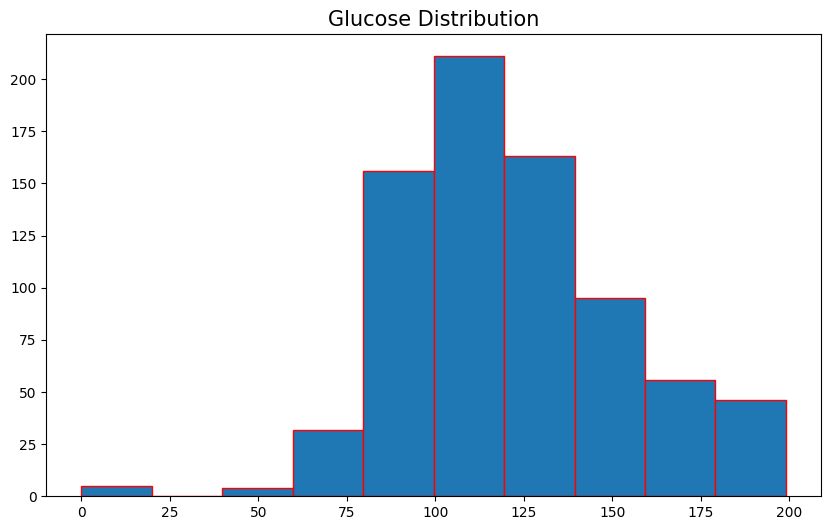

In [9]:
plot_histogram(diabetes_df['Glucose'],'Glucose Distribution') #check distribution of glucose

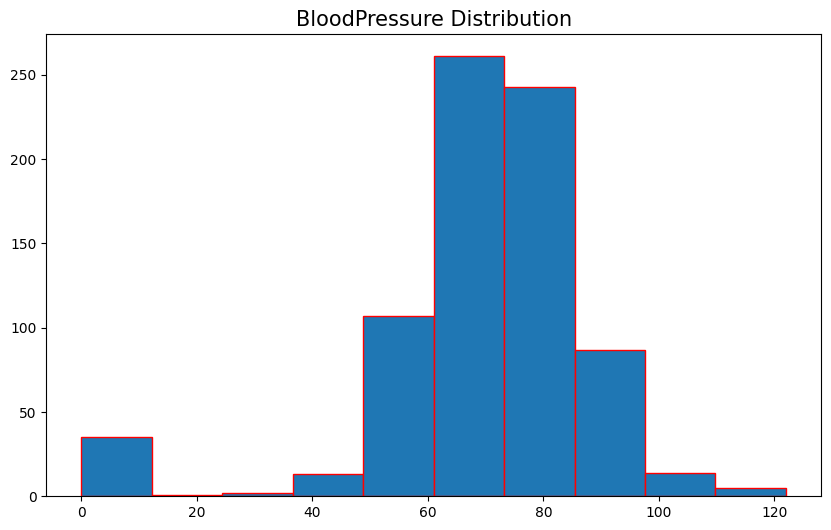

In [10]:
plot_histogram(diabetes_df['BloodPressure'],'BloodPressure Distribution') #distribution of blood pressure data

Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

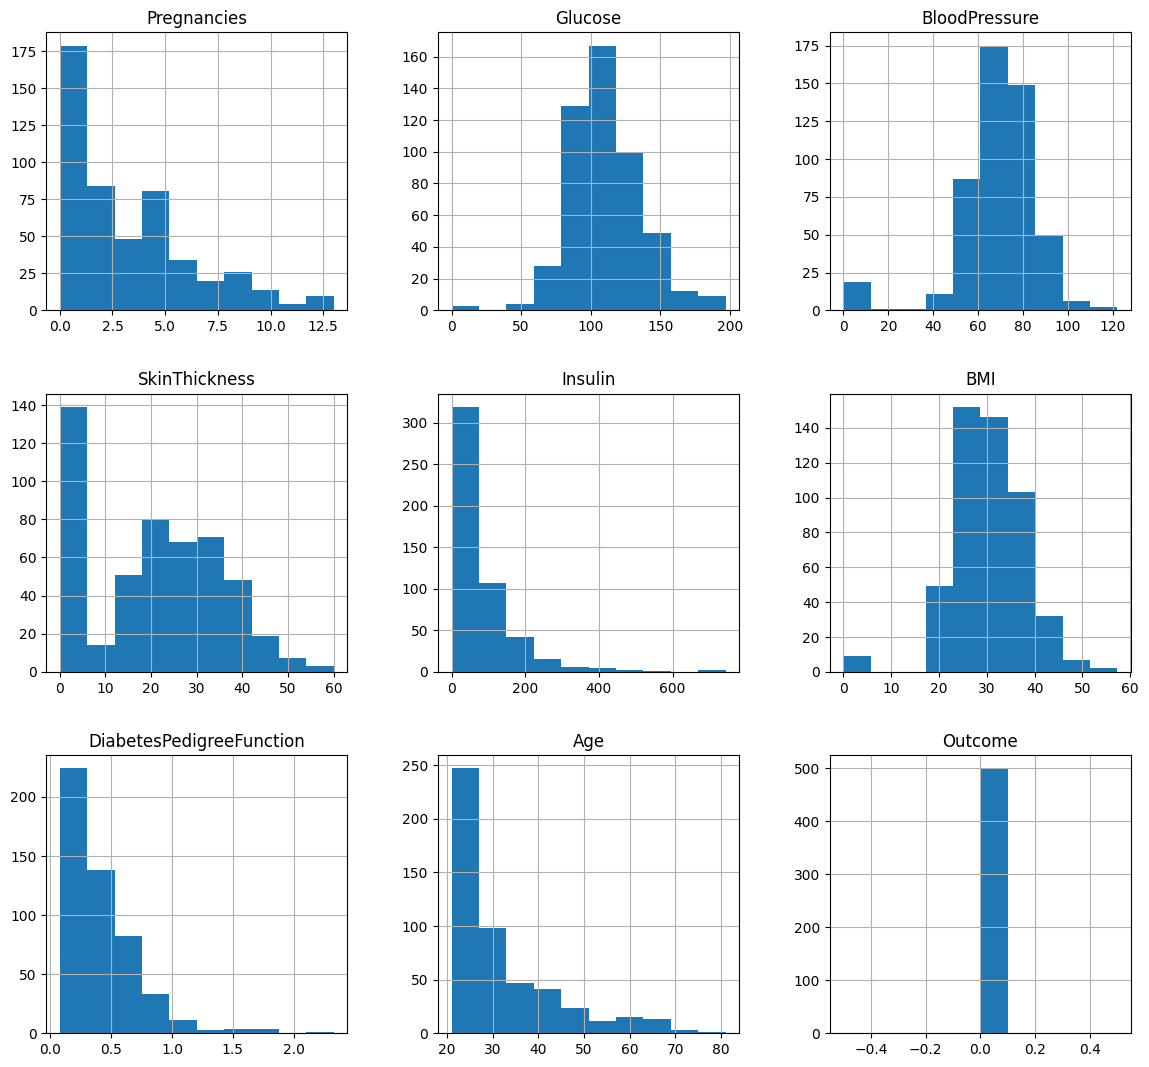

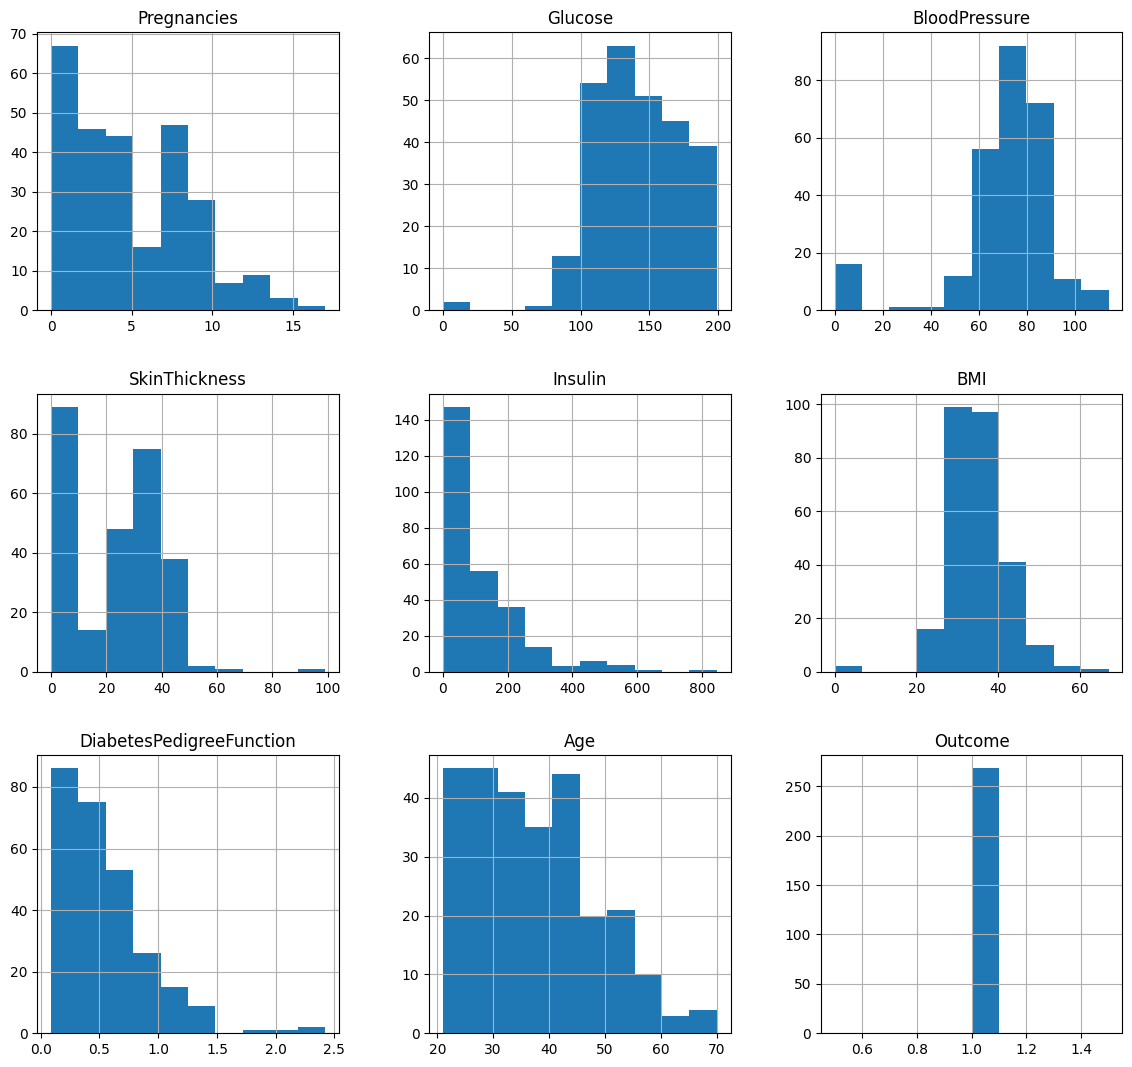

In [11]:
#plot all the attributes together
diabetes_df.groupby('Outcome').hist(figsize=(14, 13))

In [12]:
#check zeros in dependant variables
for column in diabetes_df.columns[:-1]:
  print(get_zeros_outcome_count(diabetes_df,column))

Total No of zeros found in Pregnancies : 111
Outcome
0    73
1    38
Name: Age, dtype: int64
None
Total No of zeros found in Glucose : 5
Outcome
0    3
1    2
Name: Age, dtype: int64
None
Total No of zeros found in BloodPressure : 35
Outcome
0    19
1    16
Name: Age, dtype: int64
None
Total No of zeros found in SkinThickness : 227
Outcome
0    139
1     88
Name: Age, dtype: int64
None
Total No of zeros found in Insulin : 374
Outcome
0    236
1    138
Name: Age, dtype: int64
None
Total No of zeros found in BMI : 11
Outcome
0    9
1    2
Name: Age, dtype: int64
None
Total No of zeros found in DiabetesPedigreeFunction : 0
Series([], Name: Age, dtype: int64)
None
Total No of zeros found in Age : 0
Series([], Name: Age, dtype: int64)
None


In [13]:
#Remove zeros from blood pressure, bmi and glucose
diabetes_df_new = diabetes_df[(diabetes_df.BloodPressure != 0) & (diabetes_df.BMI) != 0 & (diabetes_df.Glucose != 0)]
diabetes_df_new.shape

(729, 9)

In [14]:
#check stats
diabetes_df_new.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,729.0,3.858711,3.357468,0.000,1.000,3.000,6.000,17.00
Glucose,729.0,121.046639,32.255215,0.000,99.000,117.000,141.000,199.00
BloodPressure,729.0,72.367627,12.375838,24.000,64.000,72.000,80.000,122.00
SkinThickness,729.0,21.499314,15.708376,0.000,0.000,24.000,33.000,99.00
Insulin,729.0,83.946502,116.803000,0.000,0.000,46.000,130.000,846.00
BMI,729.0,32.469959,6.885098,18.200,27.500,32.400,36.600,67.10
DiabetesPedigreeFunction,729.0,0.474117,0.331649,0.078,0.245,0.378,0.627,2.42
Age,729.0,33.318244,11.753078,21.000,24.000,29.000,41.000,81.00
Outcome,729.0,0.344307,0.475468,0.000,0.000,0.000,1.000,1.00


In [15]:
#Week 2 Tasks

In [16]:
#split positive data
positive_df = diabetes_df_new[diabetes_df_new['Outcome']==1]
positive_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


Outcome
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

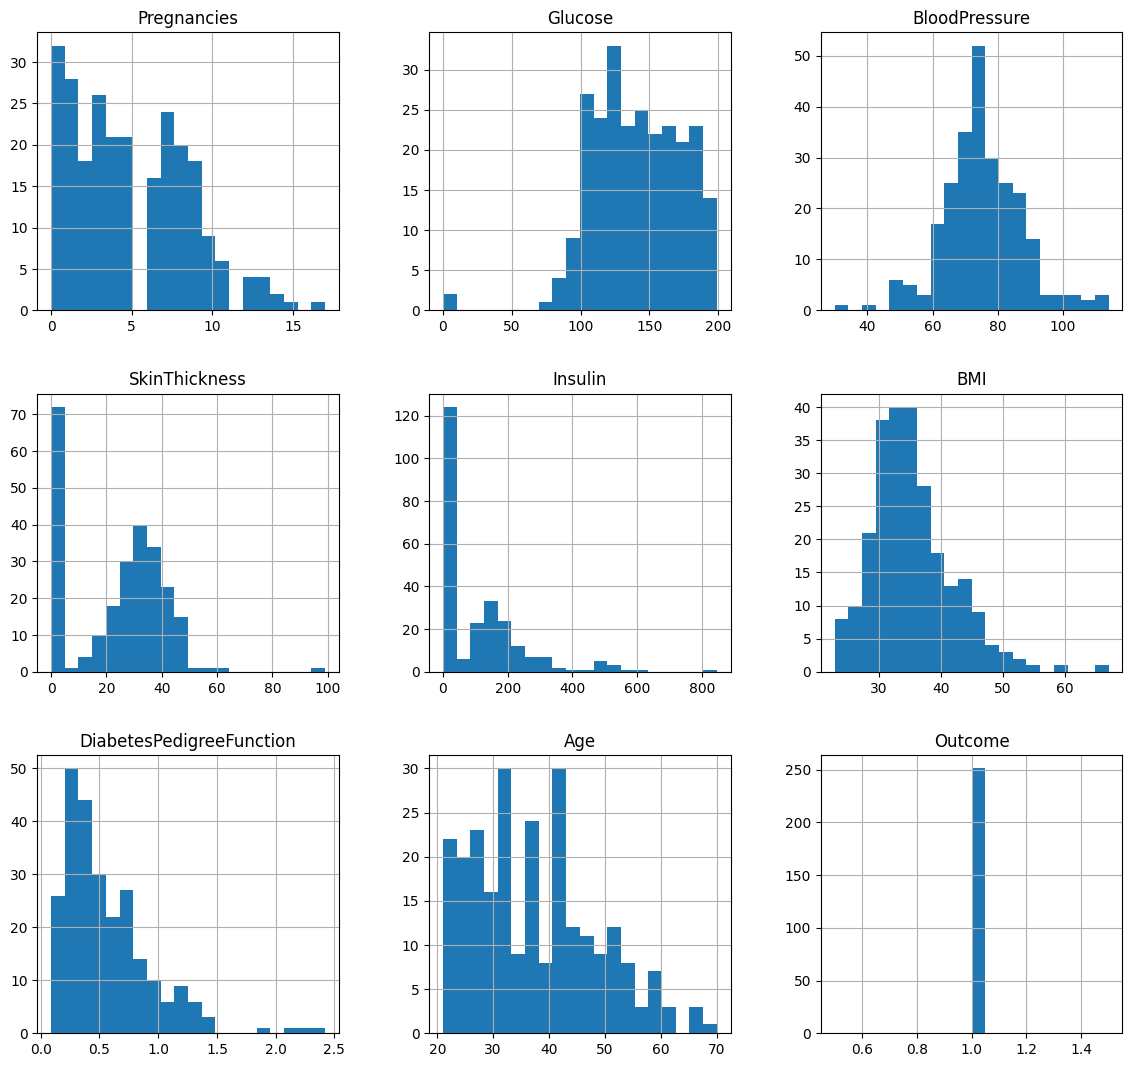

In [17]:
#visualize
positive_df.groupby('Outcome').hist(figsize = (14,13),bins=20)

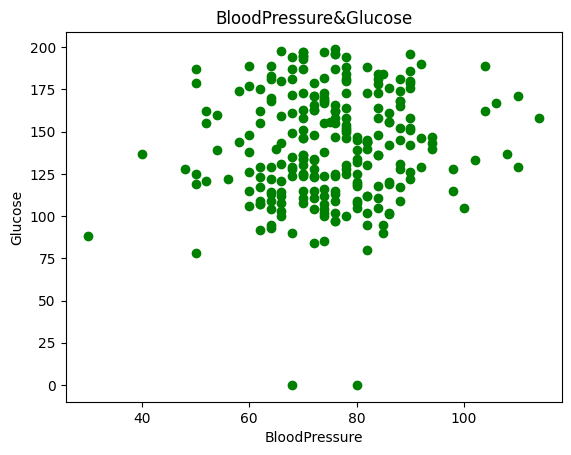

In [18]:
#create scatterplots
create_scatter_plot(positive_df['BloodPressure'],positive_df['Glucose'],'BloodPressure','Glucose','Green')

In [19]:
#split negative data
negative_df = diabetes_df_new[diabetes_df_new['Outcome']==0]
negative_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
10,4,110,92,0,0,37.6,0.191,30,0
12,10,139,80,0,0,27.1,1.441,57,0


Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

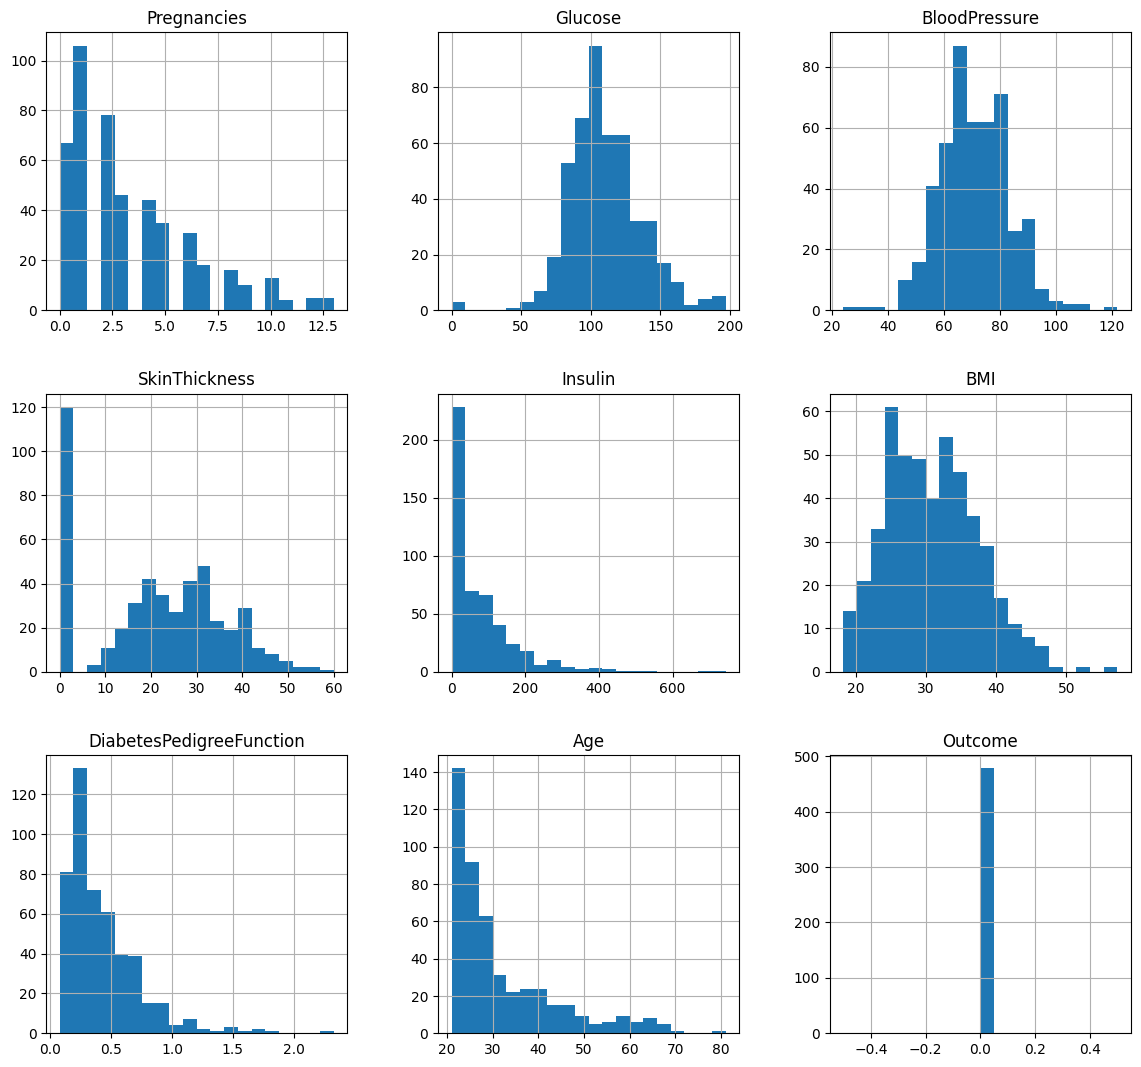

In [20]:
#visualize
negative_df.groupby('Outcome').hist(figsize = (14,13),bins=20)

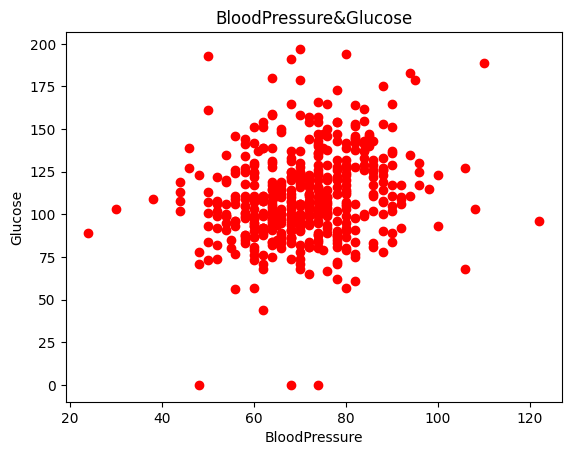

In [21]:
#create scatterplots
create_scatter_plot(negative_df['BloodPressure'],negative_df['Glucose'],'BloodPressure','Glucose','Red')

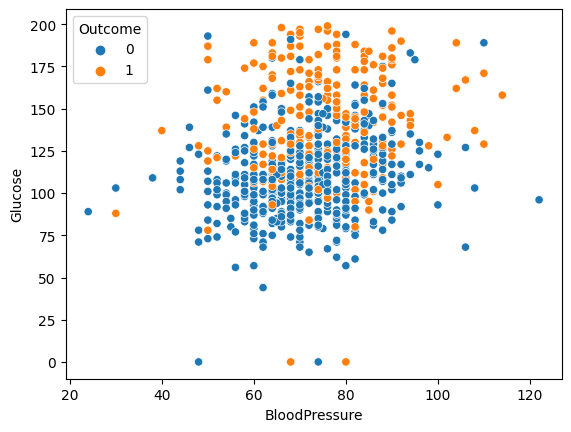

In [22]:
#visualise overlapping using seaborn
sns.scatterplot(x= "BloodPressure" ,y= "Glucose", hue="Outcome",
data=diabetes_df_new);

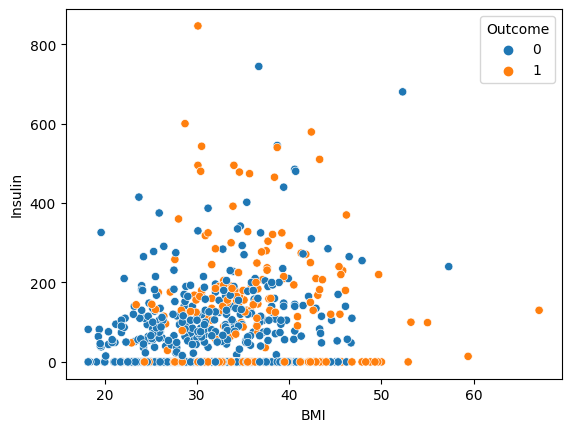

In [23]:
sns.scatterplot(x= "BMI" ,y= "Insulin", hue="Outcome",
data=diabetes_df_new);

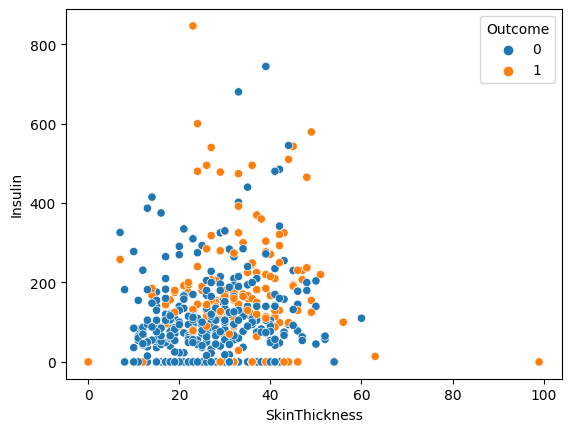

In [24]:
sns.scatterplot(x= "SkinThickness" ,y= "Insulin", hue="Outcome",
data=diabetes_df_new);

In [25]:
#check correlation
diabetes_df_new.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.136122,0.211173,-0.094715,-0.078445,0.015902,-0.023323,0.558903,0.227563
Glucose,0.136122,1.000000,0.221514,0.057149,0.338131,0.209968,0.136968,0.260216,0.459236
BloodPressure,0.211173,0.221514,1.000000,0.011497,-0.044684,0.289230,0.001987,0.325947,0.168245
SkinThickness,-0.094715,0.057149,0.011497,1.000000,0.416810,0.402527,0.176503,-0.127837,0.094472
Insulin,-0.078445,0.338131,-0.044684,0.416810,1.000000,0.190485,0.183362,-0.047502,0.143937
BMI,0.015902,0.209968,0.289230,0.402527,0.190485,1.000000,0.156613,0.024689,0.303431
DiabetesPedigreeFunction,-0.023323,0.136968,0.001987,0.176503,0.183362,0.156613,1.000000,0.025966,0.186492
Age,0.558903,0.260216,0.325947,-0.127837,-0.047502,0.024689,0.025966,1.000000,0.249033
Outcome,0.227563,0.459236,0.168245,0.094472,0.143937,0.303431,0.186492,0.249033,1.000000


<Axes: >

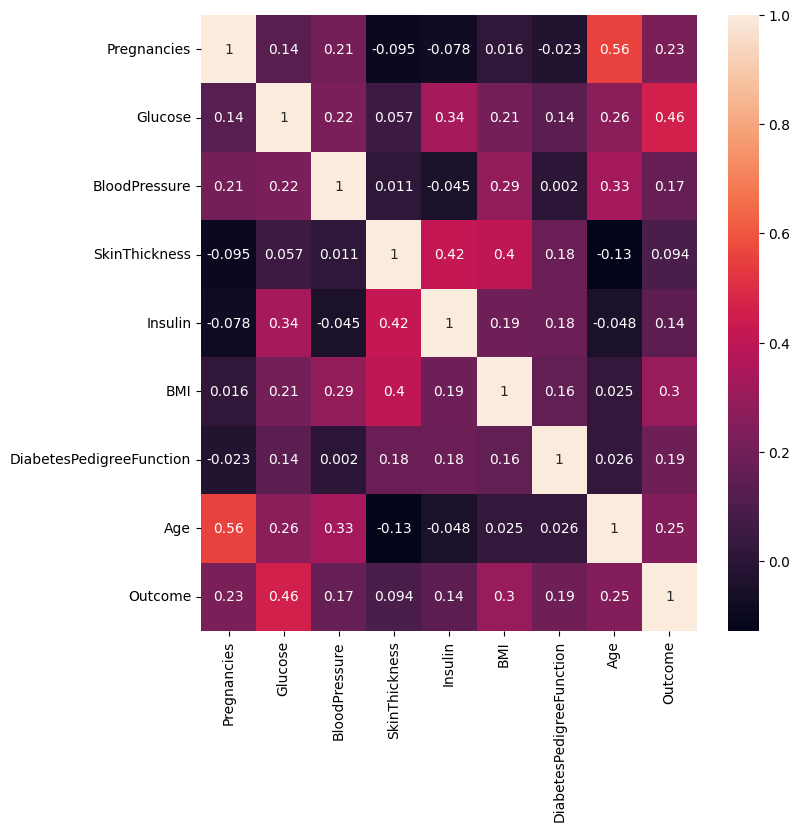

In [26]:
#correlation heatmap
plt.subplots(figsize=(8,8))
sns.heatmap(diabetes_df_new.corr(),annot=True)

In [27]:
#ML Models

In [28]:
X = diabetes_df_new[diabetes_df_new.columns[:-1]]
y = diabetes_df_new[diabetes_df_new.columns[8:]]

In [29]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [30]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [31]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =10)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import warnings filter
from warnings import simplefilter
# ignore all future warnings simplefilter(action='ignore', category=FutureWarning)

accuracyScores = []
modelScores = []
models = []
names = []
#Store algorithm into array to get score and accuracy
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [33]:
for name, model in models:
  model.fit(X_train, y_train)
  modelScores.append(model.score(X_train,y_train))
  y_pred = model.predict(X_test)
  accuracyScores.append(accuracy_score(y_test, y_pred))
  names.append(name)
tr_split_data = pd.DataFrame({'Name': names, 'Score': modelScores,'Accuracy Score': accuracyScores})
print(tr_split_data)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

  Name     Score  Accuracy Score
0   LR  0.761578        0.794521
1  SVC  0.761578        0.773973
2  KNN  0.806175        0.684932
3   DT  1.000000        0.705479
4  GNB  0.753002        0.794521
5   RF  1.000000        0.780822
6   GB  0.936535        0.773973


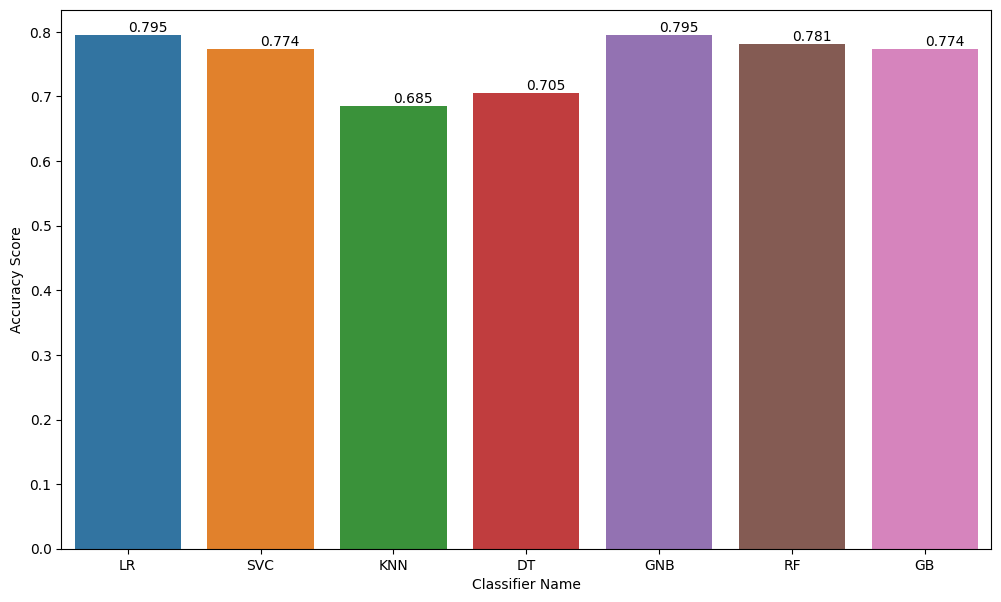

In [34]:
#plot
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Accuracy Score', data = tr_split_data)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
  height = p.get_height()
  axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height))
plt.show()

In [35]:
#cross validate
import warnings
warnings.filterwarnings('ignore')
names = []
scores = []
for name, model in models:
  kfold = KFold(n_splits=10)
  score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
  names.append(name)
  scores.append(score)
k_fold_cross_val_score = pd.DataFrame({'Name': names, 'Score': scores})
print(k_fold_cross_val_score)

  Name     Score
0   LR  0.768227
1  SVC  0.754490
2  KNN  0.720244
3   DT  0.685978
4  GNB  0.757192
5   RF  0.777873
6   GB  0.762728


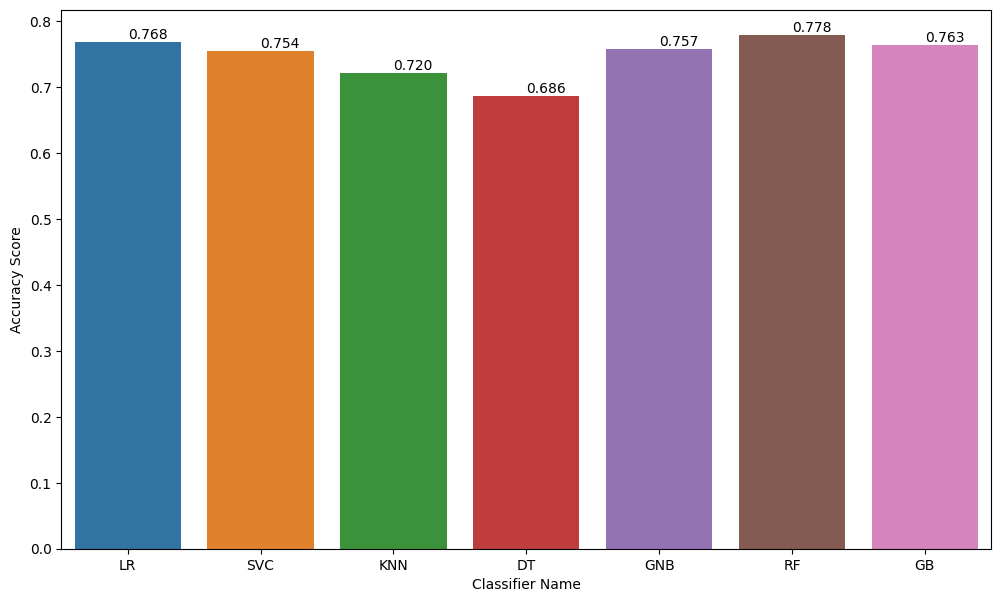

In [36]:
#plot cv scores
plt.subplots(figsize=(12,7))
axis = sns.barplot(x = 'Name', y = 'Score', data = k_fold_cross_val_score)
axis.set(xlabel='Classifier Name', ylabel='Accuracy Score')
for p in axis.patches:
  height = p.get_height()
  axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.3f}'.format(height))
plt.show()

In [40]:
#LR Model
model_LR = LogisticRegression(solver='liblinear')
model_LR.fit(X_train,y_train)
print("LogisticRegression Score :{}".format(model_LR.score(X_train,y_train)))
y_pred = model_LR.predict(X_test)
scores = (accuracy_score(y_test, y_pred))
print("LogisticRegression Accuracy Score :{}".format(scores))

LogisticRegression Score :0.7615780445969125
LogisticRegression Accuracy Score :0.7945205479452054


In [41]:
#Confusion Matrix
confusion_matrix(y,model_LR.predict(X))

array([[430,  48],
       [121, 130]])

In [42]:
#classification report
print(classification_report(y,model_LR.predict(X)))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       478
           1       0.73      0.52      0.61       251

    accuracy                           0.77       729
   macro avg       0.76      0.71      0.72       729
weighted avg       0.76      0.77      0.76       729



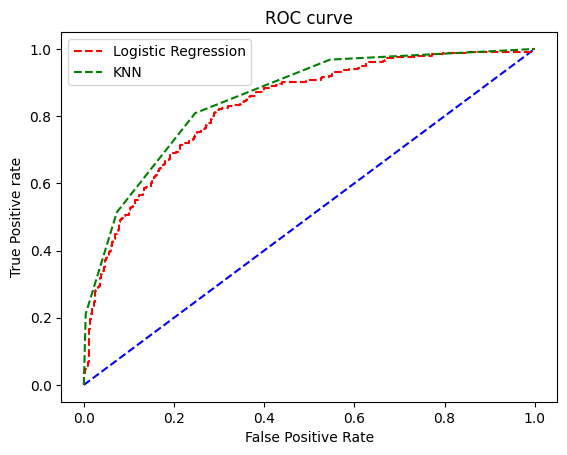

AUC LR: 0.82834 AUC KNN: 0.85284


In [43]:
#AUC ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


probs_LR = model_LR.predict_proba(X)
model_KNN = KNeighborsClassifier(n_neighbors=4)
model_KNN.fit(X_train, y_train)
probs_KNN = model_KNN.predict_proba(X)

fpr, tpr, thresholds = roc_curve(y, probs_LR[:, 1],pos_label=1)
fpr1, tpr1, thresholds1 = roc_curve(y, probs_KNN[:, 1],pos_label=1)

random_probs = [0 for i in range(len(y))]
p_fpr, p_tpr, _ = roc_curve(y, random_probs, pos_label=1)

plt.plot(p_fpr, p_tpr, linestyle='--',color='blue')
plt.plot(fpr, tpr, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='KNN')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();
auc_LR = roc_auc_score(y, probs_LR[:, 1])
auc_KNN = roc_auc_score(y, probs_KNN[:, 1])
print('AUC LR: %.5f' % auc_LR, 'AUC KNN: %.5f' % auc_KNN)

In [44]:
def generate_graph(recall, precision,name):
  plt.figure()
  plt.subplots(figsize=(10,4))
  plt.plot([0, 1], [0.5, 0.5], linestyle='--',label='No Skill')
  plt.plot(recall, precision, marker='.',label=name)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title(name)
  plt.legend(loc='best')
  plt.show()


Precision Recall Curve for LR


<Figure size 640x480 with 0 Axes>

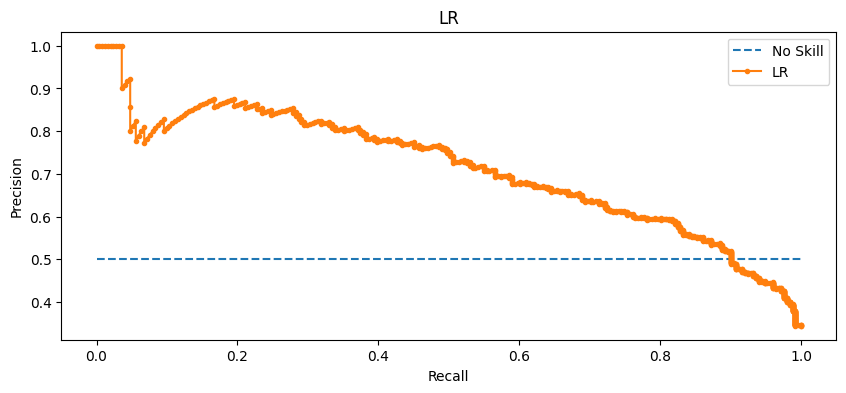

LR calculated value : F1 Score =0.606, Area Under the Curve=0.714
Average precision score:0.715

Precision Recall Curve for KNN


<Figure size 640x480 with 0 Axes>

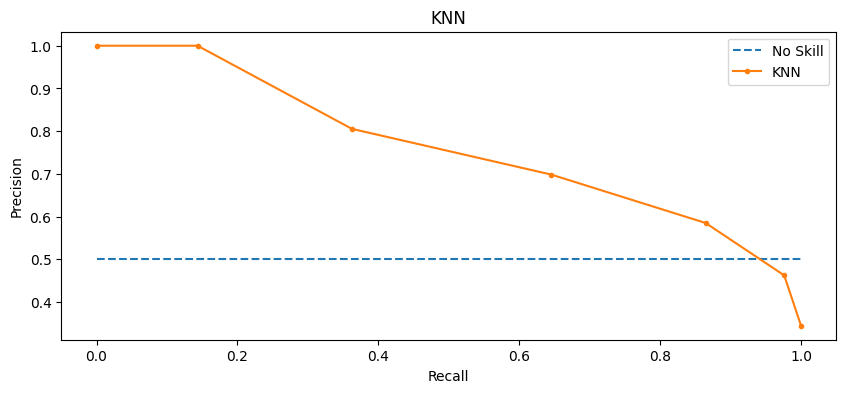

KNN calculated value : F1 Score =0.671, Area Under the Curve=0.763
Average precision score:0.705

Precision Recall Curve for DT


<Figure size 640x480 with 0 Axes>

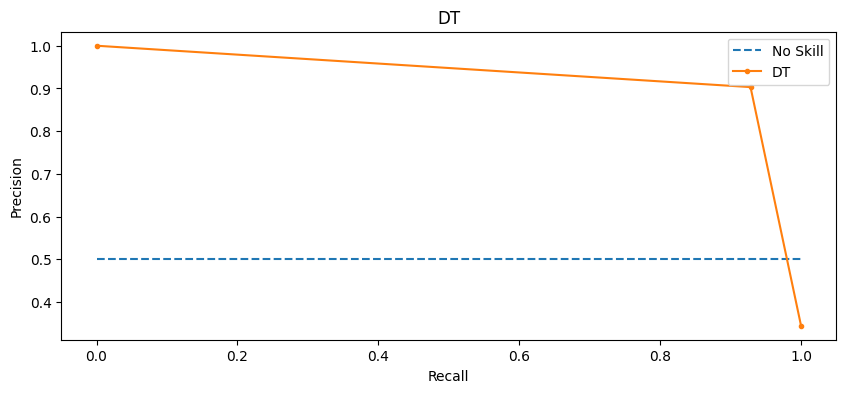

DT calculated value : F1 Score =0.916, Area Under the Curve=0.928
Average precision score:0.863

Precision Recall Curve for GNB


<Figure size 640x480 with 0 Axes>

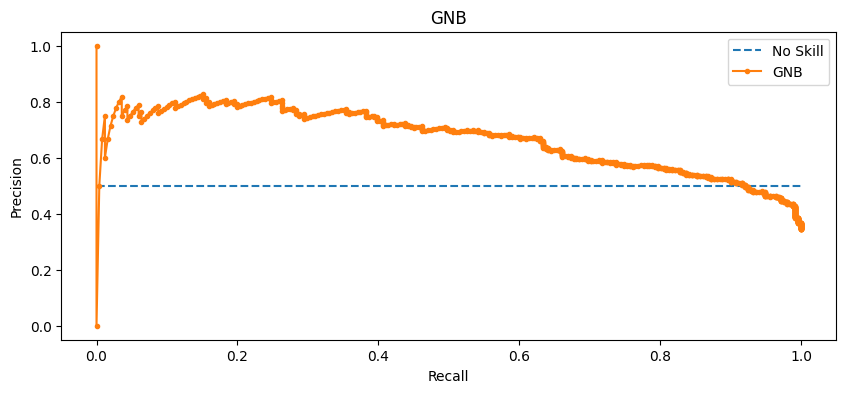

GNB calculated value : F1 Score =0.634, Area Under the Curve=0.668
Average precision score:0.671

Precision Recall Curve for RF


<Figure size 640x480 with 0 Axes>

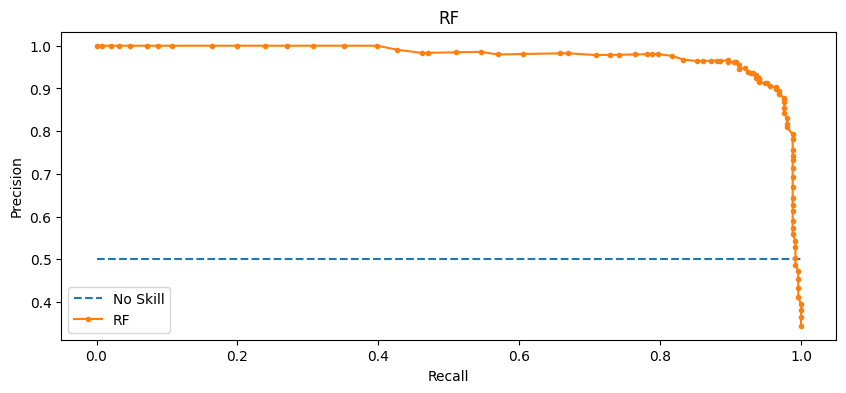

RF calculated value : F1 Score =0.932, Area Under the Curve=0.976
Average precision score:0.975

Precision Recall Curve for GB


<Figure size 640x480 with 0 Axes>

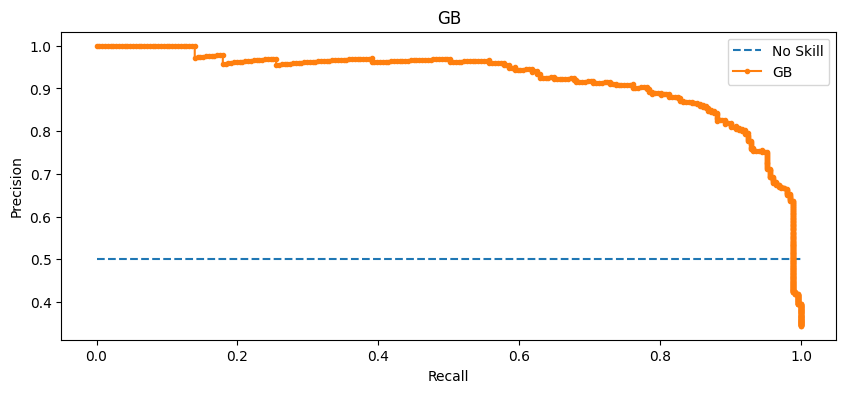

GB calculated value : F1 Score =0.852, Area Under the Curve=0.922
Average precision score:0.923


In [45]:
#Precision recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn import metrics
p_r_Models = []
p_r_Models.append(('LR', LogisticRegression(solver='liblinear')))
p_r_Models.append(('KNN', KNeighborsClassifier()))
p_r_Models.append(('DT', DecisionTreeClassifier()))
p_r_Models.append(('GNB', GaussianNB()))
p_r_Models.append(('RF', RandomForestClassifier()))
p_r_Models.append(('GB', GradientBoostingClassifier()))
for name, model in p_r_Models:
  print("\nPrecision Recall Curve for", name)
  model.fit(X_train, y_train)
  probs = model.predict_proba(X)
  probs = probs[:, 1]
  yhat = model.predict(X)
  precision, recall, thresholds = precision_recall_curve(y, probs)
  f1= f1_score(y, yhat)
  auc = metrics.auc(recall, precision)
  ap = average_precision_score(y, probs)
  generate_graph(recall, precision,name)
  print(str(name) + " calculated value : " + 'F1 Score =%.3f, Area Under the Curve=%.3f'% (f1, auc))
  print("Average precision score:%.3f"%ap)